In [14]:
import xgboost
import sklearn
import lightgbm
print(f"xgboost version: {xgboost.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"lightgbm version: {lightgbm.__version__}")


xgboost version: 2.1.3
scikit-learn version: 1.6.0
lightgbm version: 4.5.0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<ipython-input-16-e097512cad6c>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 274, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384292 -> initscore=-0.471371
[LightGBM] [Info] Start training from score -0.471371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

LightGBM CV Accuracy: 0.8327537505492437
XGBoost CV Accuracy: 0.821517795493064
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


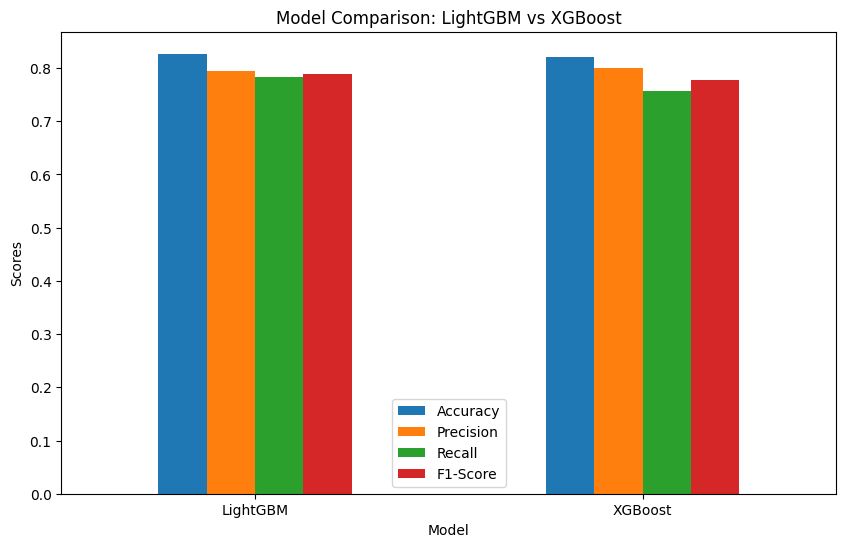

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
train = pd.read_csv('/content/Titanic_train.csv')
test = pd.read_csv('/content/Titanic_test.csv')

# Exploratory Data Analysis (EDA)
# Check for missing values
print(train.isnull().sum())

# Fill missing values (SimpleImputer)
imputer = SimpleImputer(strategy='median')
train['Age'] = imputer.fit_transform(train[['Age']])
test['Age'] = imputer.transform(test[['Age']])

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])
test['Sex'] = label_encoder.transform(test['Sex'])

train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

# Feature and Target Variables
X_train = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y_train = train['Survived']
X_test = test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Split dataset into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build Models (LightGBM and XGBoost)
# LightGBM Model
lgbm_model = lgb.LGBMClassifier(objective='binary', metric='binary_error')

# XGBoost Model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Cross-validation using StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores for LightGBM
lgbm_cv_scores = []
for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    lgbm_model.fit(X_train_cv, y_train_cv)
    lgbm_preds = lgbm_model.predict(X_val_cv)
    lgbm_cv_scores.append(accuracy_score(y_val_cv, lgbm_preds))

# Cross-validation scores for XGBoost
xgb_cv_scores = []
for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    xgb_model.fit(X_train_cv, y_train_cv)
    xgb_preds = xgb_model.predict(X_val_cv)
    xgb_cv_scores.append(accuracy_score(y_val_cv, xgb_preds))

# Print cross-validation results
print(f"LightGBM CV Accuracy: {np.mean(lgbm_cv_scores)}")
print(f"XGBoost CV Accuracy: {np.mean(xgb_cv_scores)}")

# Train models and evaluate on validation set
lgbm_model.fit(X_train_split, y_train_split)
xgb_model.fit(X_train_split, y_train_split)

lgbm_preds = lgbm_model.predict(X_val_split)
xgb_preds = xgb_model.predict(X_val_split)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")

# Evaluate models
evaluate_model(y_val_split, lgbm_preds, 'LightGBM')
evaluate_model(y_val_split, xgb_preds, 'XGBoost')

# Visualize Performance Comparison
models = ['LightGBM', 'XGBoost']
accuracy = [accuracy_score(y_val_split, lgbm_preds), accuracy_score(y_val_split, xgb_preds)]
precision = [precision_score(y_val_split, lgbm_preds), precision_score(y_val_split, xgb_preds)]
recall = [recall_score(y_val_split, lgbm_preds), recall_score(y_val_split, xgb_preds)]
f1 = [f1_score(y_val_split, lgbm_preds), f1_score(y_val_split, xgb_preds)]

# Plot performance metrics
metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

metrics.set_index('Model', inplace=True)
metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: LightGBM vs XGBoost')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.show()
